# Estonia Cruise Disaster. 
MS Estonia was a cruise ferry built in 1979/80 at the German shipyard Meyer Werft in Papenburg. The ship sank in 1994 in the Baltic Sea between Sweden, Åland, Finland and Estonia, and it was one of the worst maritime disasters of the 20th century. It is the second-deadliest peacetime sinking of a European ship, after the RMS Titanic, and the deadliest peacetime shipwreck to have occurred in European waters, with 852 lives lost

This Analysis is to explore details in the data about this tragedy.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn.cluster import KMeans

In [19]:
# importing in the dataset
df = pd.read_csv("data/estonia-passenger-list.csv")

In [20]:
# checking the data contents
df.head()

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0
1,2,Estonia,LEA,AALISTE,F,22,C,0
2,3,Estonia,AIRI,AAVASTE,F,21,C,0
3,4,Sweden,JURI,AAVIK,M,53,C,0
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0


In [21]:
# checking for any missing data, and dtypes that are incorrect
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  989 non-null    int64 
 1   Country      989 non-null    object
 2   Firstname    989 non-null    object
 3   Lastname     989 non-null    object
 4   Sex          989 non-null    object
 5   Age          989 non-null    int64 
 6   Category     989 non-null    object
 7   Survived     989 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 61.9+ KB


In [22]:
# Looking at some statistical data
df.describe()

,PassengerId,Age,Survived
count,989.000000,989.000000,989.000000
mean,494.992922,44.575329,0.138524
std,285.643660,17.235146,0.345624
min,1.000000,0.000000,0.000000
25%,248.000000,30.000000,0.000000
50%,495.000000,44.000000,0.000000
75%,742.000000,59.000000,0.000000
max,989.000000,87.000000,1.000000


In [23]:
# checking for any Nan values
df.isna().sum()

PassengerId    0
Country        0
Firstname      0
Lastname       0
Sex            0
Age            0
Category       0
Survived       0
dtype: int64

In [24]:
# check for any duplicates
df.duplicated().sum()

0

In [25]:
# cleaning up outliears
Q1 = df['Age'].quantile(0.35)
Q3 = df['Age'].quantile(0.75)
iqr = Q3 - Q1 
filter = (df['Age'] >= Q1 - 1.5 * iqr) & (df['Age'] <= Q3 + 1.5 *iqr)
df_clean = df.loc[filter]

## What is the general age breakdown of passengers on the ship?

From the data we can see that the majority of the passengers are in their 40's.

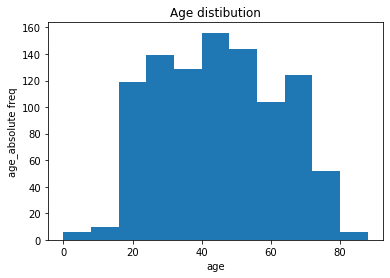

In [26]:
# Visualizing the distribution for age range
bins = np.arange(0, df["Age"].max()+8, 8)
df["Age"].hist(bins=bins)
plt.grid(False)
plt.xlabel("age")
plt.ylabel("age_absolute freq")
plt.title("Age distibution");

## Are there any difference in passengers numbers when it comes to genders?

Looking at the difference in genders is small, and negligible. 51% are male, and 49% of passengers are female.

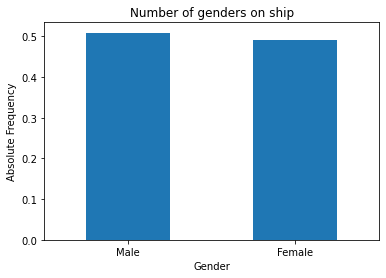

In [27]:
# checking to see number of gender on the ship
(df_clean["Sex"].value_counts()/df_clean.shape[0]).plot(kind="bar")
plt.xticks(rotation=0)
plt.xlabel("Gender")
plt.xticks([0,1], ["Male", "Female"])
plt.ylabel("Absolute Frequency")
plt.title("Number of genders on ship");

## Which country has the most passengers. 
Sweden, and Estonia has the most passenger on board.

Because of this population size is it safe to assume more Swedish, and Estonians died in this tragedy?

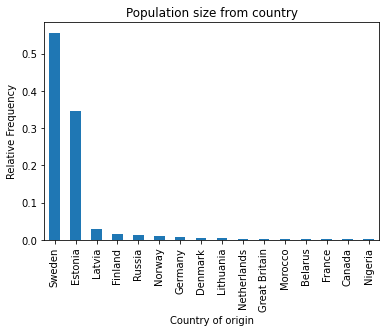

In [28]:
# plotting number of people per country
(df_clean["Country"].value_counts()/df.shape[0]).plot(kind="bar");
plt.xlabel("Country of origin")
plt.ylabel("Relative Frequency")
plt.title("Population size from country");

### what is the median age?

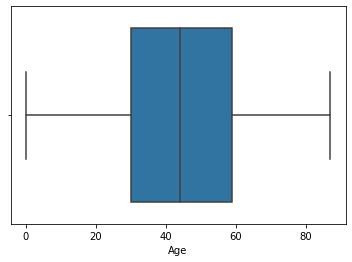

In [29]:

# using a boxplot to find out the average age
sb.boxplot(df["Age"])

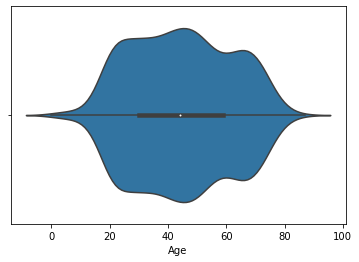

In [30]:
# Using a violin plot to determine the age distribution
sb.violinplot(df["Age"])

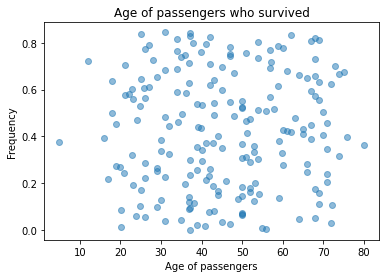

In [31]:
# creating a samples so one can plot the frequency of users
samples = np.random.choice(df_clean.shape[0], 200, replace=True)
df_samples = df_clean.iloc[samples]
max_n_value = (df_samples["Survived"].value_counts()/df_samples.shape[0])[0]
surv_freq = np.linspace(0, max_n_value, df_samples.shape[0])
sb.regplot(x=df_samples["Age"], y=surv_freq, fit_reg=False, x_jitter=0.1, scatter_kws={"alpha":1/2});
plt.xlabel("Age of passengers")
plt.ylabel("Frequency")
plt.title("Age of passengers who survived");

## What is the age breakdown from each country?
Top 2 countries:
- Sweden median age are passengers in their late 40's, and early 50's.
- Estonias making up the 2nd largest group their median age is late 20's early 30's.

The median ages range from early 20's to early 50's.

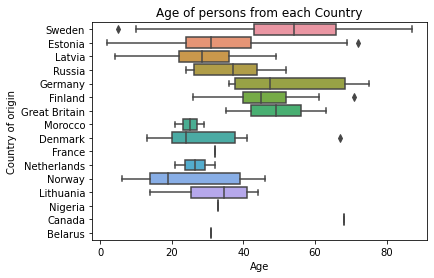

In [32]:
# Obtaining the average age per country
sb.boxplot(data=df_clean, x="Age", y="Country");
plt.ylabel("Country of origin")
plt.xlabel("Age")
plt.title("Age of persons from each Country");


## Are there any difference when it comes to Survival Between the genders?
Males make up 51% of the population while females make up 49%. 

Even though females make up almost half of the population only 5% of females actually survived.
While 21% of males Survived. 

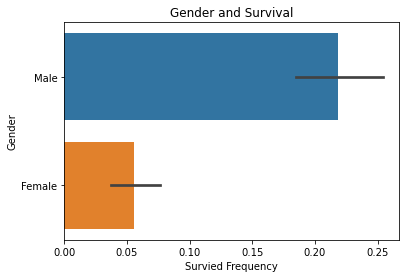

In [33]:
# Finding out the correaltion of gender survival
sb.barplot(y=df["Sex"], x=df["Survived"]==1);
plt.xlabel("Survied Frequency")
plt.ylabel("Gender")
plt.title("Gender and Survival")
plt.yticks([0,1], ["Male", "Female"]);


## Is there a correlation between age, gender, and survival?
- The median age of males, and females who died were in their early 40's. I didn't find a difference there.
- When it comes to the survival of male and females both were in their early 30's.

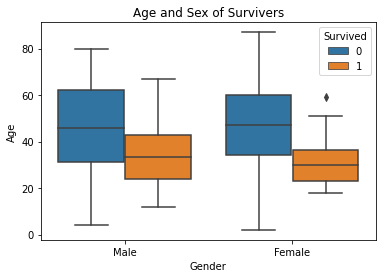

In [34]:
# creating a boxplot to indentify the Sex and Age of those who survived
sb.boxplot(data=df_clean, x="Sex", y="Age", hue="Survived");
plt.xlabel("Gender")
plt.ylabel("Age")
plt.title("Age and Sex of Survivers");
plt.xticks([0,1], ["Male", "Female"]);

## Using Machine Learning to find group similarities.
I'm using K-Nearest Neighbor algorithm to find groups that have similar features.

The optimal grouping for this particular dataset was 3.

In [35]:
# Making my categorical data into dummies for Clustering
df_clean["Category"] = pd.get_dummies(df_clean["Category"])
df_clean["Country"] = pd.get_dummies(df_clean["Country"])
df_clean["Sex"] = pd.get_dummies(df_clean["Sex"])

In [41]:
# Dropping groups I will not need
data = df_clean.drop(["PassengerId", "Firstname", "Lastname"], axis=1)

In [42]:
# searching for the right centriod number to get how many cluster groups should be applied
scores = []
for center in range(1, 11):
    model_1 = KMeans(center)
    model_1.fit(data)
    pred = model_1.predict(data)
    scores.append(abs(model_1.score(data)))

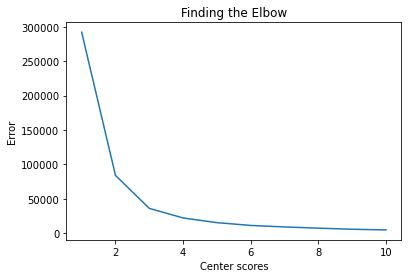

In [43]:
# Creating a plot with scores to find the Elbow
centers = list(range(1, 11))
plt.plot(centers, scores)
plt.xlabel("Center scores")
plt.ylabel("Error")
plt.title("Finding the Elbow");

In [44]:
#Instatiating, fitting, and predicting the model
model = KMeans(3)
labels = model.fit_predict(data)
data["groups"] = labels + 1

### What are population sizes of each group?
- group 3 has the larger population with a of size 369
- group 1 has a population size of 286
- group 2 has a population size of 333


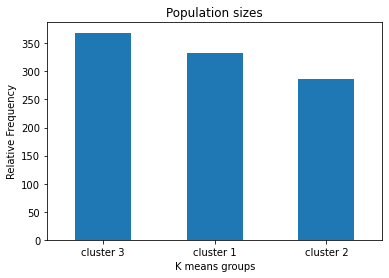

In [45]:
# Checking to see the population size of each group
(data["groups"].value_counts()).plot(kind="bar")
plt.xticks([0,1,2], ["cluster 3", "cluster 1", "cluster 2"], rotation=0)
plt.xlabel("K means groups")
plt.ylabel("Relative Frequency")
plt.title("Population sizes");

## The median age of each group.
- group 1 age range from late 30's to late 50's
- group 3 age range from late 60's to early 80's
- group 2 age range from early teens to early 30's

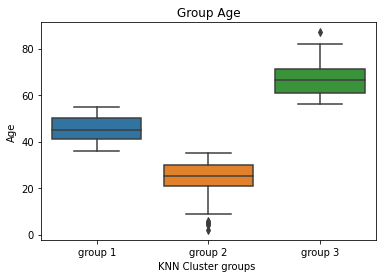

In [48]:
# boxplots to indentify the average age per group
sb.boxplot(data=data, x="groups", y="Age");
plt.xlabel("KNN Cluster groups ")
plt.ylabel("Age")
plt.title("Group Age")
plt.xticks([0,1,2], ["group 1", "group 2", "group 3"]);


## Which group has the most survivors?
- When looking at the visualization we can see group 2 has the most survivors by almost 25% 

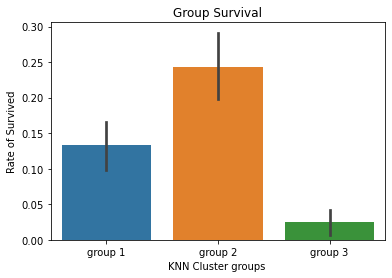

In [49]:
# Using a Violin plot to indentify average age of survivers per group
sb.barplot(data=data, y="Survived", x="groups");
plt.xlabel("KNN Cluster groups ")
plt.ylabel("Rate of Survived")
plt.title("Group Survival")
plt.xticks([0,1,2], ["group 1", "group 2", "group 3"]);
